# Question 3

### import

In [ ]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

### load data


In [ ]:
# download data

def vectorize_sequence(X, dimension=1000):
  zeros = np.zeros(shape=(X.shape[0], dimension))
  for i, x in enumerate(X):
    zeros[i, x] = 1
  return zeros

(x_train, y_train), (x_test, y_test) = datasets.reuters.load_data(num_words=1000)

x_train, x_test = vectorize_sequence(x_train), vectorize_sequence(x_test)
y_train , y_test = to_categorical(y_train), to_categorical(y_test)

input_shape = x_train.shape[1]
class_nums = y_train.shape[1]
print(input_shape, class_nums)
print(f'train data shape : {x_train.shape}')
print(f'test data shape : {x_test.shape}')

print(f'target shape : {y_train.shape}')

1000 46
train data shape : (8982, 1000)
test data shape : (2246, 1000)
target shape : (8982, 46)


### train and define model

In [ ]:
# create model

epochs_num = 20
batch_size = 512
validation_split_rate = 0.15

def display_confusion_matrix(y_predict, y_target) -> None:
  plt.figure(figsize=(20,20))
  ax = plt.axes()
  cm = confusion_matrix(y_predict, y_target)
  sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d', ax = ax )
  ax.set_xlabel('predict')
  ax.set_ylabel('actual')
  ax.set_title('Confusion Matrix')
  plt.show()

def display_train_acc(history) -> None:
  h = history.history
  print(f'Train =>> \tAccuracy : {h["accuracy"][-1]}\tval_accuracy : {h["val_accuracy"][-1]}')
  print(f'Train =>> \tLoss : {h["loss"][-1]}\tval_loss : {h["val_loss"][-1]}')


def display_history(history) -> None:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.grid(True)
  plt.title('accuracy')
  plt.plot(history.history['accuracy'], 'ro--')
  plt.plot(history.history['val_accuracy'], 'bo--')
  plt.legend(['accuracy', 'val_accuracy'], loc='center right')
  plt.subplot(1,2,2)
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.grid(True)
  plt.title('loss')
  plt.plot(history.history['loss'],'ro--')
  plt.plot(history.history['val_loss'],'bo--')
  plt.legend(['loss', 'val_loss'], loc='center right')
  # plt.subplot(1,2,3)
  # display_confusion_matrix()
  plt.show()


def create_model(activation_func, loss_func) -> keras.Model:
  model = Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
  model.add(layers.Dense(64, activation= 'relu'))
  model.add(layers.Dense(class_nums, activation=activation_func))
  model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy',])
  return model

def train_model(model: keras.Model):
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs_num, validation_split=validation_split_rate, verbose=0)
  return history


### sigmoid - binary_crossentropy

In [ ]:
# create model and train it
model = create_model(activation_func='sigmoid', loss_func='binary_crossentropy')
history_sigbin = train_model(model= model)
display_train_acc(history=history_sigbin)

Train =>> 	Accuracy : 0.7972229719161987	val_accuracy : 0.7522255182266235
Train =>> 	Loss : 0.030178511515259743	val_loss : 0.03622172400355339


custom accruacy : 0.7395369545859305
71/71 [==============================] - 0s 1ms/step - loss: 0.0369 - accuracy: 0.7395
[0.03687836602330208, 0.7395369410514832]
**************************************************


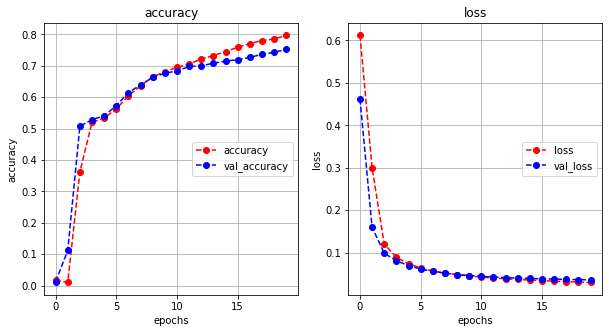

In [ ]:
# display results
predict = model.predict(x_test)
predict = np.argmax(predict, axis=1)
target = np.argmax(y_test, axis=1)
acc = np.sum(predict==target) / len(target)
print(f'custom accruacy : {acc}')
print(model.evaluate(x_test, y_test))
print('*'*50)
display_history(history=history_sigbin)


### softmax - categorical_crossentropy

In [ ]:
model = create_model('softmax', 'categorical_crossentropy')
history_sofcat = train_model(model=model)
display_train_acc(history=history_sofcat)

Train =>> 	Accuracy : 0.9252030253410339	val_accuracy : 0.778931736946106
Train =>> 	Loss : 0.330032616853714	val_loss : 0.9692134857177734


71/71 [==============================] - 0s 1ms/step - loss: 1.0059 - accuracy: 0.7689
[1.0058852434158325, 0.7689225077629089]
**************************************************


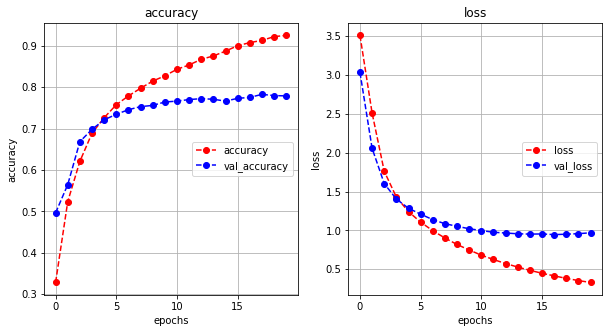

In [ ]:
# display result
print(model.evaluate(x_test, y_test))
print('*' * 50)
display_history(history=history_sofcat)

### sigmoid - MSE

In [ ]:
model = create_model('sigmoid', 'mean_squared_error')
history_sigmse = train_model(model=model)
display_train_acc(history=history_sigmse)

Train =>> 	Accuracy : 0.6427822709083557	val_accuracy : 0.6357566714286804
Train =>> 	Loss : 0.009320908226072788	val_loss : 0.009922496974468231


71/71 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.6256
[0.010011211037635803, 0.6255565285682678]
**************************************************


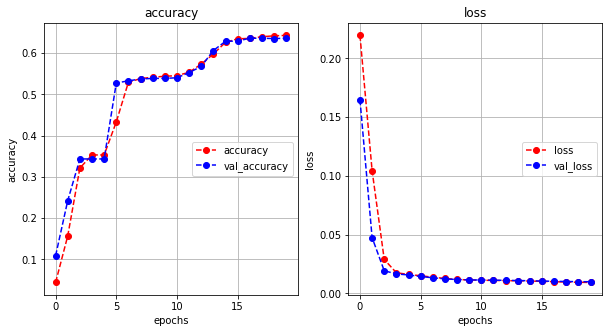

In [ ]:
# display result
print(model.evaluate(x_test, y_test))
print('*' * 50)
display_history(history=history_sigmse)

### softmax - MSE

In [ ]:
model = create_model('softmax', 'mean_squared_error')
history_sofmse= train_model(model=model)
display_train_acc(history=history_sofmse)

Train =>> 	Accuracy : 0.8663871884346008	val_accuracy : 0.7640949487686157
Train =>> 	Loss : 0.0041639599949121475	val_loss : 0.007577864918857813


71/71 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.7560
[0.007634480483829975, 0.7560107111930847]
**************************************************


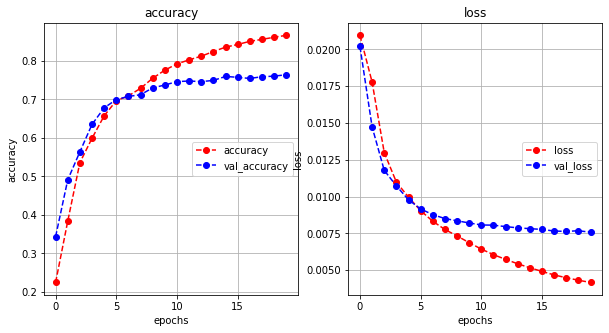

In [ ]:
# display result
print(model.evaluate(x_test, y_test))
print('*' * 50)
display_history(history=history_sofmse)

### linear - MSE

In [ ]:
model = create_model('linear', 'mean_squared_error')
history_linmse= train_model(model=model)
display_train_acc(history=history_linmse)

Train =>> 	Accuracy : 0.7808488607406616	val_accuracy : 0.716617226600647
Train =>> 	Loss : 0.0065615372732281685	val_loss : 0.008992832154035568


71/71 [==============================] - 0s 1ms/step - loss: 0.0091 - accuracy: 0.7008
[0.009112834930419922, 0.700801432132721]
**************************************************


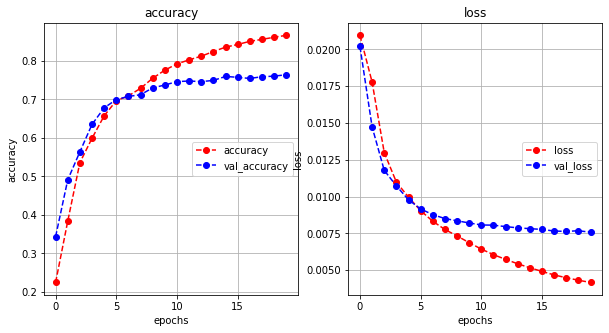

In [ ]:
# display result
print(model.evaluate(x_test, y_test))
print('*' * 50)
display_history(history=history_sofmse)